# Deliverable 3


In [33]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [34]:
# Drop 'EIN' column
application_df = application_df.drop(columns=["EIN"], axis=1)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [35]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

### Optimization Attempt 1: Keeping NAME column and binning NAME, ASK_AMT, APPLICATION_TYPE & CLASSIFICATION columns


In [36]:
# Look at NAME value counts for binning
name_counts = application_df.NAME.value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

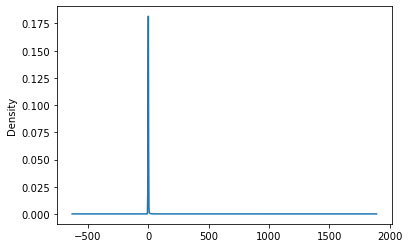

In [37]:
name_counts.plot.density()

In [38]:
# Check how many names are greater than 10
name_counts[name_counts>10]

PARENT BOOSTER USA INC                                                    1260
TOPS CLUB INC                                                              765
UNITED STATES BOWLING CONGRESS INC                                         700
WASHINGTON STATE UNIVERSITY                                                492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                            408
                                                                          ... 
USA SWIMMING INC                                                            11
SIGMA ALPHA OMEGA CHRISTIAN SORORITY INC                                    11
SOCIETY FOR PRESERVATION & ENCOURMT OF BARBERSHOP QUARTET SINGING AMER      11
SONS OF ITALY IN AMERICA                                                    11
FELLOWSHIP OF CHRISTIAN COWBOYS INC                                         11
Name: NAME, Length: 204, dtype: int64

In [39]:
# Check how many names are less than or equal to 10
name_counts[name_counts <=10]

CALIFORNIA WOMENS CHORUS                                                10
DISTRICT 21 AMERICAN CONTRACT BRIDGE LEAGUE                             10
UNION OF CALIFORNIA STATE WORKERS                                       10
BOYS TEAM CHARITY INC                                                   10
ANCIENT AND FREE ACCEPTED MASONS OF MISSOURI                            10
                                                                        ..
ST LOUIS SLAM WOMENS FOOTBALL                                            1
AIESEC ALUMNI IBEROAMERICA CORP                                          1
WEALLBLEEDRED ORG INC                                                    1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI     1
WATERHOUSE CHARITABLE TR                                                 1
Name: NAME, Length: 19364, dtype: int64

In [40]:
# Determine which values to replace if counts are less than or equal to 10
replace_name = list(name_counts[name_counts < 10].index)


# Replace in dataframe
for name in replace_name:
    application_df.NAME = application_df.NAME.replace(name,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                      21022
PARENT BOOSTER USA INC                      1260
TOPS CLUB INC                                765
UNITED STATES BOWLING CONGRESS INC           700
WASHINGTON STATE UNIVERSITY                  492
                                           ...  
CASCADE 4-H FOUNDATION                        10
FREE & ACCEPTED MASONS OF WASHINGTON          10
NEW MEXICO GARDEN CLUBS INC                   10
NATIONAL ASSOCIATION OF HISPANIC NURSES       10
UNION OF CALIFORNIA STATE WORKERS             10
Name: NAME, Length: 223, dtype: int64

In [41]:
# Look at ASK_AMT value counts for binning
ask_amt_counts = application_df.ASK_AMT.value_counts()
ask_amt_counts

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [42]:
# Bin ASK_AMT values
replace_ask_amt = list(ask_amt_counts.index)

# Replace in dataframe
for amt in replace_ask_amt:
    if amt <= 5000:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("$0-5000"))
    elif amt <= 49999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("$5001-49999"))
    elif amt < 99999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("$50000-99999"))
    elif amt < 499999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("$100000-499999"))
    elif amt < 999999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("$500000-999999"))
    elif amt < 4999999:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("$1M-5M"))
    else:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,str("$5M+"))
    
application_df.ASK_AMT = application_df.ASK_AMT.astype(str)

# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()

$0-5000           25398
$5001-49999        2947
$100000-499999     2305
$50000-99999       1421
$1M-5M              940
$500000-999999      651
$5M+                637
Name: ASK_AMT, dtype: int64

In [43]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [44]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)


# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [45]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [46]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1800].index)


# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [47]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()

In [48]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\mario\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ART THERAPY ASSOCIATION INC,...,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_$0-5000,ASK_AMT_$100000-499999,ASK_AMT_$1M-5M,ASK_AMT_$50000-99999,ASK_AMT_$500000-999999,ASK_AMT_$5001-49999,ASK_AMT_$5M+
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(columns=application_cat, axis=1)
application_df.head()

,STATUS,IS_SUCCESSFUL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,...,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_$0-5000,ASK_AMT_$100000-499999,ASK_AMT_$1M-5M,ASK_AMT_$50000-99999,ASK_AMT_$500000-999999,ASK_AMT_$5001-49999,ASK_AMT_$5M+
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)

C:\Users\mario\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [52]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                21840     
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 24,301
Trainable params: 24,301
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [54]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [59]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

In [60]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4046 - accuracy: 0.8021
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4049 - accuracy: 0.8014
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4045 - accuracy: 0.8028
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4044 - accuracy: 0.8015
Epoch 5/100
775/804 [===========================>..] - ETA: 0s - loss: 0.4038 - accuracy: 0.8017
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.4042 - accuracy: 0.8018
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4051 - accuracy: 0.8016
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4046 - accuracy: 0.8021
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4047 - accuracy: 0.8019
Epoch 9/100
804/804 [==============================] -

783/804 [============================>.] - ETA: 0s - loss: 0.4029 - accuracy: 0.8020
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.4017 - accuracy: 0.8026
Epoch 66/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4018 - accuracy: 0.8022
Epoch 67/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4018 - accuracy: 0.8026
Epoch 68/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4027 - accuracy: 0.8031
Epoch 69/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4016 - accuracy: 0.8036
Epoch 70/100
798/804 [============================>.] - ETA: 0s - loss: 0.4030 - accuracy: 0.8023
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.4026 - accuracy: 0.8026
Epoch 71/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4016 - accuracy: 0.8029
Epoch 72/100
804/804 

In [61]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5405 - accuracy: 0.7857 - 307ms/epoch - 1ms/step
Loss: 0.5405014157295227, Accuracy: 0.7856559753417969


In [63]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization1.h5")

### Optimization Attempt 2: Adding more hidden layers



In [64]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                21840     
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 10)                310       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 24,591
Trainable params: 24,591
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [66]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [76]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

In [77]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train,epochs=500, callbacks=[cp_callback])

Epoch 1/500
804/804 [==============================] - 1s 2ms/step - loss: 0.4042 - accuracy: 0.8015
Epoch 2/500
804/804 [==============================] - 1s 2ms/step - loss: 0.4038 - accuracy: 0.8017
Epoch 3/500
804/804 [==============================] - 1s 2ms/step - loss: 0.4043 - accuracy: 0.8025
Epoch 4/500
804/804 [==============================] - 1s 2ms/step - loss: 0.4041 - accuracy: 0.8010
Epoch 5/500
802/804 [============================>.] - ETA: 0s - loss: 0.4034 - accuracy: 0.8019
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.4036 - accuracy: 0.8018
Epoch 6/500
804/804 [==============================] - 1s 2ms/step - loss: 0.4037 - accuracy: 0.8020
Epoch 7/500
804/804 [==============================] - 1s 2ms/step - loss: 0.4037 - accuracy: 0.8022
Epoch 8/500
804/804 [==============================] - 1s 2ms/step - loss: 0.4039 - accuracy: 0.8018
Epoch 9/500
804/804 [==============================] -

775/804 [===========================>..] - ETA: 0s - loss: 0.4005 - accuracy: 0.8027
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.4011 - accuracy: 0.8026
Epoch 66/500
804/804 [==============================] - 1s 2ms/step - loss: 0.4008 - accuracy: 0.8034
Epoch 67/500
804/804 [==============================] - 1s 2ms/step - loss: 0.4016 - accuracy: 0.8032
Epoch 68/500
804/804 [==============================] - 1s 2ms/step - loss: 0.4005 - accuracy: 0.8032
Epoch 69/500
804/804 [==============================] - 1s 2ms/step - loss: 0.4015 - accuracy: 0.8030
Epoch 70/500
776/804 [===========================>..] - ETA: 0s - loss: 0.3992 - accuracy: 0.8034
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.4007 - accuracy: 0.8027
Epoch 71/500
804/804 [==============================] - 1s 2ms/step - loss: 0.4002 - accuracy: 0.8034
Epoch 72/500
804/804 

804/804 [==============================] - 1s 2ms/step - loss: 0.3998 - accuracy: 0.8040
Epoch 128/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3997 - accuracy: 0.8036
Epoch 129/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3995 - accuracy: 0.8039
Epoch 130/500
785/804 [============================>.] - ETA: 0s - loss: 0.3991 - accuracy: 0.8035
Epoch 130: saving model to checkpoints\weights.130.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.4000 - accuracy: 0.8031
Epoch 131/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3999 - accuracy: 0.8039
Epoch 132/500
804/804 [==============================] - 1s 2ms/step - loss: 0.4000 - accuracy: 0.8028
Epoch 133/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3990 - accuracy: 0.8041
Epoch 134/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3994 - accuracy: 0.8030
Epoch 135/500
799/804 [==========================

801/804 [============================>.] - ETA: 0s - loss: 0.3999 - accuracy: 0.8040
Epoch 190: saving model to checkpoints\weights.190.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.3998 - accuracy: 0.8041
Epoch 191/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3985 - accuracy: 0.8034
Epoch 192/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3991 - accuracy: 0.8033
Epoch 193/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3983 - accuracy: 0.8033
Epoch 194/500
804/804 [==============================] - 1s 2ms/step - loss: 0.4000 - accuracy: 0.8035
Epoch 195/500
802/804 [============================>.] - ETA: 0s - loss: 0.3984 - accuracy: 0.8043
Epoch 195: saving model to checkpoints\weights.195.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.3986 - accuracy: 0.8042
Epoch 196/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3991 - accuracy: 0.8036
Epoch 197/5

804/804 [==============================] - 1s 2ms/step - loss: 0.3983 - accuracy: 0.8043
Epoch 252/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3990 - accuracy: 0.8040
Epoch 253/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3985 - accuracy: 0.8036
Epoch 254/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3985 - accuracy: 0.8043
Epoch 255/500
784/804 [============================>.] - ETA: 0s - loss: 0.3978 - accuracy: 0.8049
Epoch 255: saving model to checkpoints\weights.255.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.3981 - accuracy: 0.8045
Epoch 256/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3993 - accuracy: 0.8038
Epoch 257/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3978 - accuracy: 0.8043
Epoch 258/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3987 - accuracy: 0.8044
Epoch 259/500
804/804 [==========================

804/804 [==============================] - 1s 2ms/step - loss: 0.3994 - accuracy: 0.8047
Epoch 315/500
774/804 [===========================>..] - ETA: 0s - loss: 0.3958 - accuracy: 0.8066
Epoch 315: saving model to checkpoints\weights.315.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.3981 - accuracy: 0.8047
Epoch 316/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3978 - accuracy: 0.8045
Epoch 317/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3976 - accuracy: 0.8045
Epoch 318/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3976 - accuracy: 0.8040
Epoch 319/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3978 - accuracy: 0.8051
Epoch 320/500
797/804 [============================>.] - ETA: 0s - loss: 0.3973 - accuracy: 0.8047
Epoch 320: saving model to checkpoints\weights.320.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.3972 - accuracy: 0.8047
Epoch 321/5

Epoch 376/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3976 - accuracy: 0.8048
Epoch 377/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3986 - accuracy: 0.8045
Epoch 378/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3985 - accuracy: 0.8040
Epoch 379/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3984 - accuracy: 0.8039
Epoch 380/500
787/804 [============================>.] - ETA: 0s - loss: 0.3985 - accuracy: 0.8040
Epoch 380: saving model to checkpoints\weights.380.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.3983 - accuracy: 0.8042
Epoch 381/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3984 - accuracy: 0.8035
Epoch 382/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3984 - accuracy: 0.8045
Epoch 383/500
804/804 [==============================] - 2s 2ms/step - loss: 0.3988 - accuracy: 0.8037
Epoch 384/500
804/804 [============

804/804 [==============================] - 1s 2ms/step - loss: 0.3973 - accuracy: 0.8051
Epoch 440/500
804/804 [==============================] - ETA: 0s - loss: 0.3976 - accuracy: 0.8044
Epoch 440: saving model to checkpoints\weights.440.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.3976 - accuracy: 0.8044
Epoch 441/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3978 - accuracy: 0.8037
Epoch 442/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3975 - accuracy: 0.8037
Epoch 443/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3975 - accuracy: 0.8042
Epoch 444/500
804/804 [==============================] - 1s 2ms/step - loss: 0.3991 - accuracy: 0.8044
Epoch 445/500
799/804 [============================>.] - ETA: 0s - loss: 0.3981 - accuracy: 0.8043
Epoch 445: saving model to checkpoints\weights.445.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.3978 - accuracy: 0.8045
Epoch 446/5

In [78]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6019 - accuracy: 0.7879 - 313ms/epoch - 1ms/step
Loss: 0.6019039154052734, Accuracy: 0.7878717184066772


In [79]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization2.h5")

### Optimization Attempt 3: Try Random Forest Classifier



In [80]:
# Import dependencies
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [81]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")


 Random forest predictive accuracy: 0.787
